In [1]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

### Function to compute the NLL ###
def nll(exp, obsval, obserr):
    n = norm(obsval, obserr)
    return -2*n.logpdf(exp)

### Assume we made this observation ###
### I.e. our data fit is RK = 0.7 +/- 0.1
data_obs = (0.7,0.1)

### Assume the SM expectation is RK = 1
sm_exp = 1

### So the DLL in Data is
data_dll = nll(sm_exp, *data_obs) - nll(data_obs[0], *data_obs)
print('DLL in Data:', data_dll)

### Using the straightfoward conversion of -2DLL ~ -2DChi2 then the significance is
print('Significance = ', data_dll**0.5)

DLL in Data: 9.000000000000004
Significance =  3.0000000000000004


So we get in data we $-2\Delta \log L = 9$ corresponding to a significance of $3\sigma$.

Quite clearly this is exactly what we expect if the measurement is $R_K = 0.7\pm 0.1$ and the SM expectation is $R_K =1$

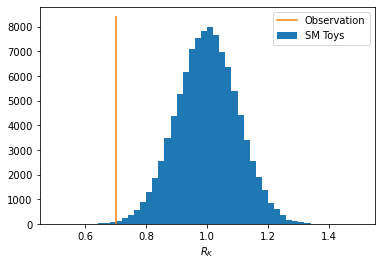

In [3]:
### Now try what I guess you are doing with the toys

### Generate from the SM with the relevant uncertainty (in this case 0.1)
sm_dist = norm(sm_exp, data_obs[1])
sm_toys = sm_dist.rvs(size=100000)

### Can plot this distribution with the data observation
plt.hist( sm_toys, range=(0.5,1.5), bins=50, label='SM Toys')
plt.plot( (data_obs[0],data_obs[0]), (0,plt.ylim()[1]), label='Observation' )
plt.xlabel('$R_K$')
plt.legend()

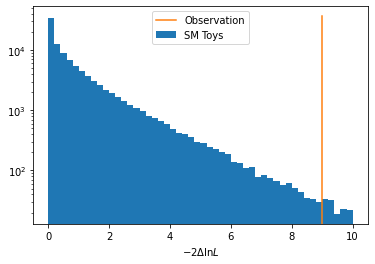

In [7]:
### Now for each toy we compute the DLL between the toy value and the SM expectation
toy_dlls = nll( sm_exp, sm_toys, data_obs[1] ) - nll(sm_toys, sm_toys, data_obs[1])

## And we can also now plot these
plt.hist( toy_dlls, range=(0,10), bins=50, label='SM Toys')
plt.plot( (data_dll,data_dll), (0,plt.ylim()[1]), label='Observation')
plt.xlabel('$-2\Delta\ln L$')
plt.legend()
plt.yscale('log')

In [8]:
### Now count the fraction of toys above the DLL value in data (this is the p-value)
pval = len(toy_dlls[toy_dlls>data_dll])/len(toy_dlls)
pval_err = (pval * (1-pval)/len(toy_dlls))**0.5

print(f'p-value = {pval} +/- {pval_err}')

p-vale = 0.00266 +/- 0.000162878003425877


In [18]:
### Now convert this p-value into a significance (using either 1 or 2 sided conversion)

## Two-sided this should be the equivalent of TMath::ChisquareQuantile(1-pval,1)**0.5
sigma_2sided = chi2.ppf(1-pval,1)**0.5

## One-sided this should be the equivalent of RooStats::PValueToSignificance or scipy.stats.norm.ppf(1-pval)
sigma_1sided = chi2.ppf(1-2*pval,1)**0.5

print('sigma (1-side):', sigma_1sided)
print('sigma (2-side):', sigma_2sided)

sigma (1-side): 2.786990734958961
sigma (2-side): 3.004520308584539


So you see here that the 2-sided significance is correct